<a href="https://colab.research.google.com/github/devhassan82/AI_ASSIGNMEN1/blob/main/Used_Car_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Estimation of Used Car Prices - Data Science project


## Import Libraries
All libraries are used for specific tasks including data preprocessing, visualization, transformation and evaluation

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")


---------------------------------------------------------

"--------------Business Problem: Estimate the price of a used car based on chara/features such as manufacturer name, transmission, color...-----------"

## Import Data
### Read Training Data
The training set is read locally and the **head** function is used to display the data for intial understanding

"======Data understanding======"

In [ ]:
import pandas as pd

dataTrain = pd.read_csv('data_train.csv')

dataTrain.head()

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
0,Volkswagen,automatic,black,130000,2016,diesel,diesel,1.6,universal,False,owned,front,True,17,38,67,13150.0
1,Renault,manual,brown,149000,2012,gasoline,gasoline,1.6,sedan,False,owned,front,False,9,3,100,7500.0
2,Kia,automatic,brown,110000,2014,gasoline,gasoline,1.6,hatchback,False,owned,front,False,5,10,91,12200.0
3,Opel,automatic,other,255100,2007,gasoline,gasoline,1.8,hatchback,False,owned,front,False,10,4,91,4950.0
4,Mazda,manual,blue,650000,1999,gasoline,gasoline,2.0,sedan,False,owned,front,True,5,7,62,3000.0


In [ ]:
type(dataTrain)  #data type

pandas.core.frame.DataFrame

The **shape** function displays the number of rows and columns in the training set

In [ ]:
dataTrain.shape # check dimension

(50000, 17)

Checking for null values in each column and displaying the sum of all null values in each column (Training Set)

In [ ]:
dataTrain.isnull().sum()

,0
manufacturer_name,0
transmission,0
color,0
odometer_value,0
year_produced,0
engine_fuel,0
engine_type,0
engine_capacity,15
body_type,0
has_warranty,0


In [ ]:
#Show me the locations where the null values are
dataTrain[dataTrain.isnull().any(axis=1)]

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
4171,Fiat,automatic,orange,49000,2014,electric,electric,NaN,hatchback,False,owned,front,False,18,1,11,16000.0
6808,Nissan,automatic,white,57357,2015,electric,electric,NaN,hatchback,False,owned,front,False,20,57,75,13850.0
13927,Fiat,automatic,orange,49000,2014,electric,electric,NaN,hatchback,False,owned,front,False,18,1,11,16000.0
15761,Nissan,automatic,black,84000,2014,electric,electric,NaN,hatchback,False,owned,front,False,12,19,138,14500.0
17362,Fiat,automatic,orange,27000,2013,electric,electric,NaN,hatchback,False,owned,front,True,11,13,77,14900.0
21708,Fiat,automatic,orange,27000,2013,electric,electric,NaN,hatchback,False,owned,front,True,11,13,77,14900.0
27661,BMW,automatic,other,67000,2018,electric,electric,NaN,liftback,False,owned,rear,False,6,2,57,39999.0
29655,Nissan,automatic,white,50000,2014,electric,electric,NaN,hatchback,False,owned,front,False,12,7,18,12900.0
31396,BMW,automatic,white,54150,2015,electric,electric,NaN,hatchback,False,owned,rear,True,23,17,18,24750.0
35316,BMW,automatic,other,67000,2018,electric,electric,NaN,liftback,False,owned,rear,False,6,2,57,39999.0


In [ ]:
dataTrain = dataTrain.dropna() # Dropping those records having null values

Checking if null values are eliminated (Training set)

In [ ]:
dataTrain.isnull().sum()

,0
manufacturer_name,0
transmission,0
color,0
odometer_value,0
year_produced,0
engine_fuel,0
engine_type,0
engine_capacity,0
body_type,0
has_warranty,0


In [ ]:
dataTrain.shape # printing the shape -- Yes, 15 rows containing null values are removed

(49985, 17)

Checking the data types

In [ ]:
dataTrain.dtypes  # checking the data type of every column

,0
manufacturer_name,object
transmission,object
color,object
odometer_value,int64
year_produced,int64
engine_fuel,object
engine_type,object
engine_capacity,float64
body_type,object
has_warranty,bool


Checking the correlation between the numerical features and with the target

## EDA (Exploratory Data Analysis)
Visualizations are used to understand the relationship between the target variable and the features, in addition to correlation coefficient.
The visuals include heatmap,boxplot etc.


# Heat map

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 18.1 µs


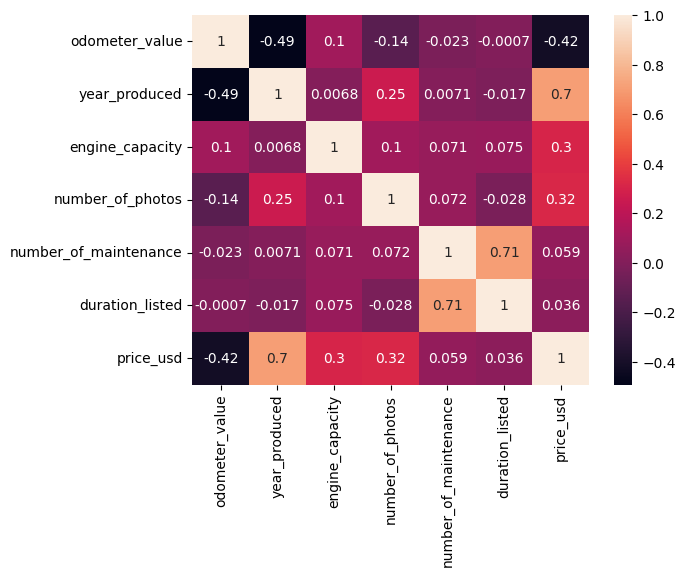

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Compute correlation matrix for numerical columns
%time
corr = dataTrain.select_dtypes(include=['number']).corr()

# Plot heatmap
sns.heatmap(corr, annot=True, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()



​FireDucks is a high-performance, compiler-accelerated DataFrame library for Python, offering full compatibility with the pandas API. It aims to significantly speed up data analysis tasks without requiring extensive code modifications.

In [ ]:
!pip install fireducks # optional for the assignment


In [ ]:
# Below cell code is optional for the assignment.. THis shows the execution time reduction with fireducks

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs


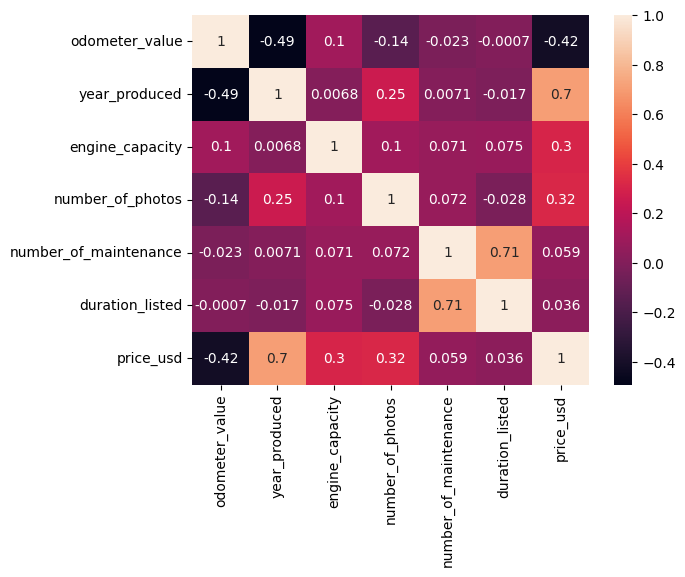

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import fireducks.pandas as pd
 #importing the pandas module that is found inside the fireducks library.
 # FireDucks is a DataFrame library specifically designed to accelerate pandas operations

#Load the data
dataTrain_fd = pd.read_csv("/content/data_train.csv")
dataTrain_fd = dataTrain_fd.dropna()

%time
corr = dataTrain_fd.select_dtypes(include=['number']).corr() #find corr

# Plot the heatmap
sns.heatmap(corr, annot=True, xticklabels=corr.columns, yticklabels=corr.columns)

plt.show()


From the heatmap, it is observed that 'year_produced' is the best feature among all the features with numerical data

Descriptive statistics

In [ ]:
 dataTrain.describe() #generate various summary statistics of a DataFrame
#Note: Only features with numeric data are considered

,odometer_value,year_produced,engine_capacity,number_of_photos,number_of_maintenance,duration_listed,price_usd
count,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000
mean,249275.754426,2002.942143,2.056894,9.660958,16.257417,80.749385,6651.131653
std,136342.510114,8.065809,0.675106,6.144711,41.542444,113.620345,6462.573155
min,0.000000,1942.000000,0.200000,1.000000,1.000000,0.000000,1.000000
25%,158000.000000,1998.000000,1.600000,5.000000,2.000000,23.000000,2100.000000
50%,250000.000000,2003.000000,2.000000,8.000000,5.000000,59.000000,4800.000000
75%,325000.000000,2009.000000,2.300000,12.000000,16.000000,91.000000,8963.290000
max,1000000.000000,2019.000000,8.000000,86.000000,1273.000000,2232.000000,50000.000000


A descriptive analysis to check incorrect entries and anormalies.

1. Count: The number of values in the dataframe.
2. Mean: The arithmetic mean or average of the values.
3. Standard Deviation (std): A measure of the dispersion or spread of the values.
4. Minimum: The minimum (smallest) value in each column.
5. 25th Percentile (25%): The value below which 25% of the data falls (1st quartile). Means 25% of the entire data falls under the value 158000 for odometer_value
6. 50th Percentile (50%): The median or value below which 50% of the data falls (2nd quartile).
7. 75th Percentile (75%): The value below which 75% of the data falls (3rd quartile).
8. Maximum: The maximum (largest) value in the Series.

**************************************************************

#Looking at the "minimum price", 1 USD is found.
#This could be a wrong entry (or an outlier)




In [ ]:
#Search for price = 1 , if so, change the price to 500
dataTrain.loc[dataTrain['price_usd'] == 1, 'price_usd'] = 500

In [ ]:
dataTrain.describe()  # now still the minimum price is 1.42 USD

,odometer_value,year_produced,engine_capacity,number_of_photos,number_of_maintenance,duration_listed,price_usd
count,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000
mean,249275.754426,2002.942143,2.056894,9.660958,16.257417,80.749385,6651.191551
std,136342.510114,8.065809,0.675106,6.144711,41.542444,113.620345,6462.513829
min,0.000000,1942.000000,0.200000,1.000000,1.000000,0.000000,1.420000
25%,158000.000000,1998.000000,1.600000,5.000000,2.000000,23.000000,2100.000000
50%,250000.000000,2003.000000,2.000000,8.000000,5.000000,59.000000,4800.000000
75%,325000.000000,2009.000000,2.300000,12.000000,16.000000,91.000000,8963.290000
max,1000000.000000,2019.000000,8.000000,86.000000,1273.000000,2232.000000,50000.000000


In [ ]:
#Search for price < 500 , if so, change the price to 500
dataTrain.loc[dataTrain['price_usd'] < 500, 'price_usd'] = 500

In [ ]:
dataTrain.describe()  # now the minimum price is 500 USD

,odometer_value,year_produced,engine_capacity,number_of_photos,number_of_maintenance,duration_listed,price_usd
count,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000
mean,249275.754426,2002.942143,2.056894,9.660958,16.257417,80.749385,6655.001201
std,136342.510114,8.065809,0.675106,6.144711,41.542444,113.620345,6458.821934
min,0.000000,1942.000000,0.200000,1.000000,1.000000,0.000000,500.000000
25%,158000.000000,1998.000000,1.600000,5.000000,2.000000,23.000000,2100.000000
50%,250000.000000,2003.000000,2.000000,8.000000,5.000000,59.000000,4800.000000
75%,325000.000000,2009.000000,2.300000,12.000000,16.000000,91.000000,8963.290000
max,1000000.000000,2019.000000,8.000000,86.000000,1273.000000,2232.000000,50000.000000


Find the distribution of the price in the entire dataset
using "bins"  -- Technique applied is called data binning

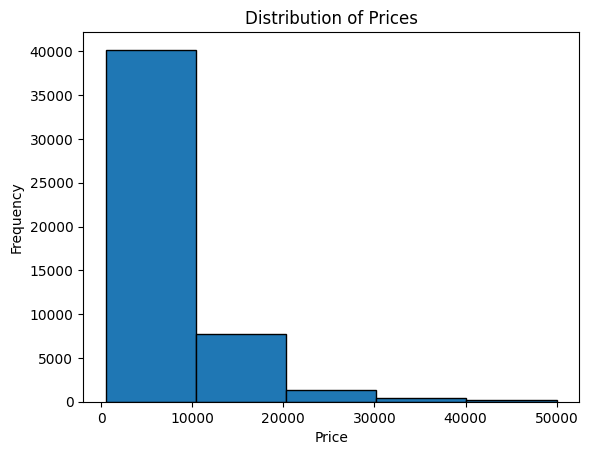

In [ ]:
import matplotlib.pyplot as plt

dataTrain['price_usd'].plot(kind = 'hist', bins = 5, edgecolor='black')   # 5 bins are used
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

From the histogram, it is understood that majority of the car samples are of lower prices

In [ ]:
dataTrain.describe(include = 'object') #summary statistics for categorical values

,manufacturer_name,transmission,color,engine_fuel,engine_type,body_type,ownership,type_of_drive
count,49985,49985,49985,49985,49985,49985,49985,49985
unique,55,2,12,5,2,12,3,3
top,Volkswagen,manual,black,gasoline,gasoline,sedan,owned,front
freq,5478,33277,9977,31255,33324,16910,48941,36001


### Regression/scatter Plot
This regression plot shows the relation between **odometer** and **price**. A slight negative correlation is observed
which shows that price is being affected by the change in odometer value.

<Axes: xlabel='odometer_value', ylabel='price_usd'>

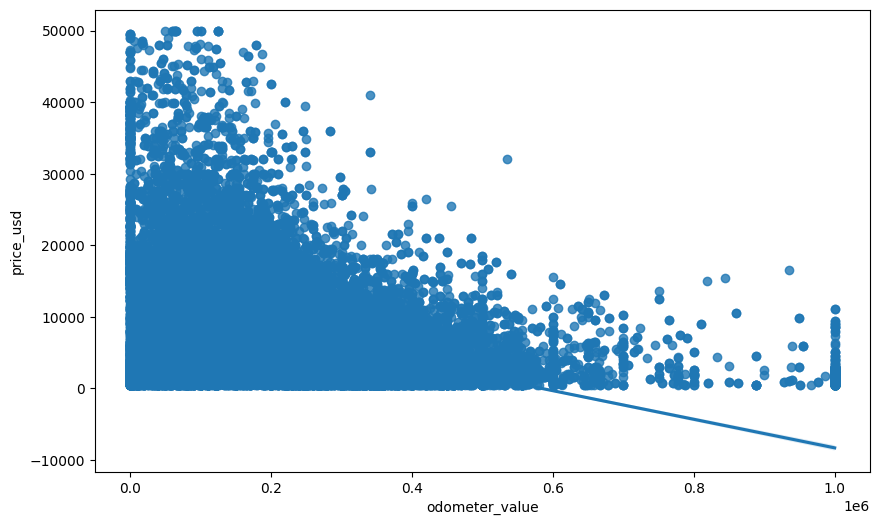

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.regplot(x="odometer_value", y="price_usd", data=dataTrain)

As observed in the plot, a **negative correlation** is observed

In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['odometer_value'], dataTrain['price_usd'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.42181154539827614  with a P-value of P = 0.0


-- Pearson corr coeff of -0.42 is obtained along with a p-value of 0.

-- The Pearson Correlation Coefficient (r) is a measure of the linear relationship between two variables. It can take values between -1 and 1

-- If r is close to 1, it indicates a strong positive linear relationship. This means that as one variable increases, the other variable tends to increase as well.

-- If r is close to -1, it indicates a strong negative linear relationship. This means that as one variable increases, the other variable tends to decrease.

-- If r is close to 0, it suggests a weak or no linear relationship. In other words, the variables are not strongly correlated.

-- Here, the Pearson Correlation Coefficient is approximately -0.422, which is closer to -1 than to 0. This indicates a moderate negative linear relationship between the two variables being correlated.

-- The p-value (probablity) is used to determine the statistical significance of the correlation. In other words, how confidently one can say a feature is correlated to the target variable.

"IMPORTANT:" A p-value less than 0.05 (commonly used significance level) suggests that the correlation is statistically significant and hence reject the Null hypothesis.

What is my null hypothesis?
H0: The feature variable is correlated to a target variable.

Very important: A P-value of 0.0 means (more confidently say the feature is correlated to target) and that the correlation is extremely unlikely to have occurred by random chance, indicating strong statistical significance.

-- The p value here (that corresponds to odometer_values) confirms strong correlation, hence this feature is a critical feature to the prediction of used car price.

The regression plot below shows a relationship between the year that the car is produced and the price of the car. A positive
correlation is observed between the two variables. This shows that the price increases with increase in production year of the car.

<Axes: xlabel='year_produced', ylabel='price_usd'>

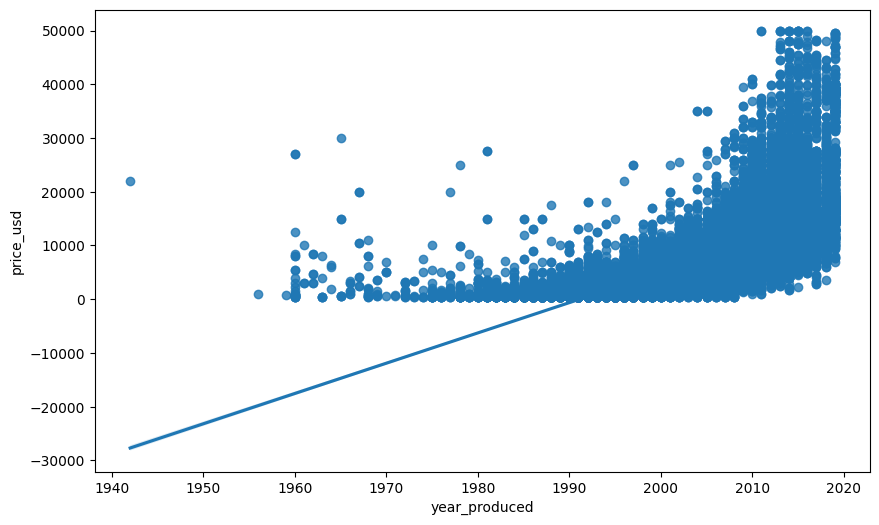

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="year_produced", y="price_usd", data=dataTrain)

As observed above, a high positive correlation of 0.7 is calculated along with the p-value of 0. This indicates that the correlation between the variables is significant hence year produced feature can be used for prediction.

In [ ]:
pearson_coef, p_value = stats.pearsonr(dataTrain['year_produced'], dataTrain['price_usd'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7040068696388824  with a P-value of P = 0.0


check for correlation between 'engine_capacity' and 'price'

<Axes: xlabel='engine_capacity', ylabel='price_usd'>

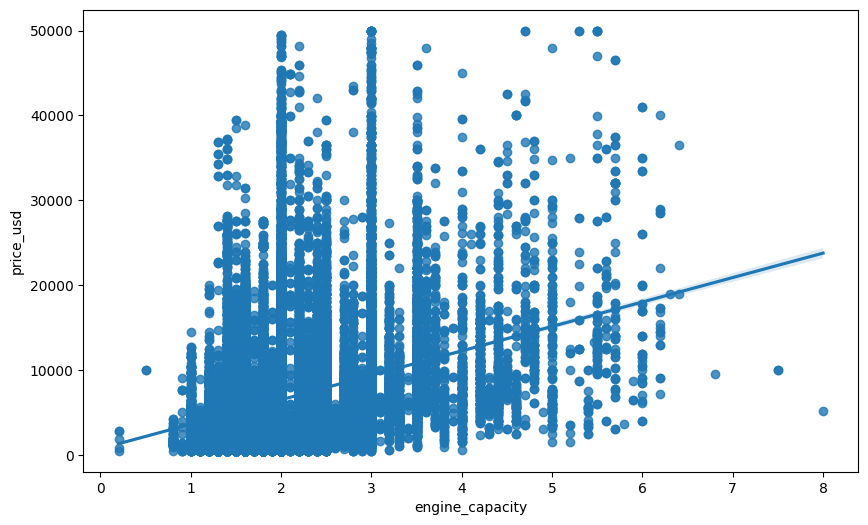

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="engine_capacity", y="price_usd", data=dataTrain)

A 0.3 correlation is calculated which is very small with a p value of 0. This indicates that even though the correlation is small but its 30% of 100 which is significant hence this feature can be used for predicition.

In [ ]:
pearson_coef, p_value = stats.pearsonr(dataTrain['engine_capacity'], dataTrain['price_usd'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.3010737475548005  with a P-value of P = 0.0


This regression plot shows an minor positive correlation observed with the help of the best fit line. The calculation will confirm the actual value.

-----check for correlation between 'number of photos' and 'price'------------

<Axes: xlabel='number_of_photos', ylabel='price_usd'>

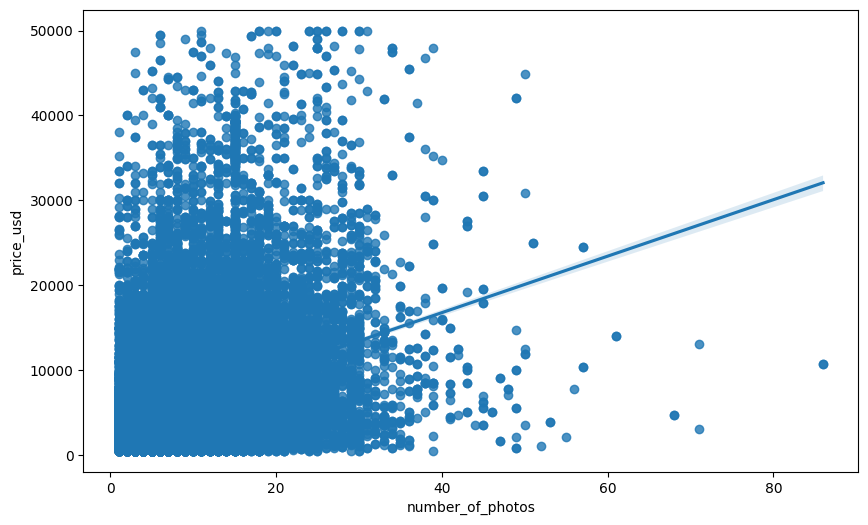

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="number_of_photos", y="price_usd", data=dataTrain)

The correlation is 0.31 based on the calculation while the p-value calculated is zero. This is similar to the last feature hence the significant 31% of 100 correlation makes this feature eligble for prediction.

In [ ]:
pearson_coef, p_value = stats.pearsonr(dataTrain['number_of_photos'], dataTrain['price_usd'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.3166513034835224  with a P-value of P = 0.0


This plot shows correlation with points all over the graph like the previous feature varibale.

-------check correlation b/w number of mantenance and price-------------

<Axes: xlabel='number_of_maintenance', ylabel='price_usd'>

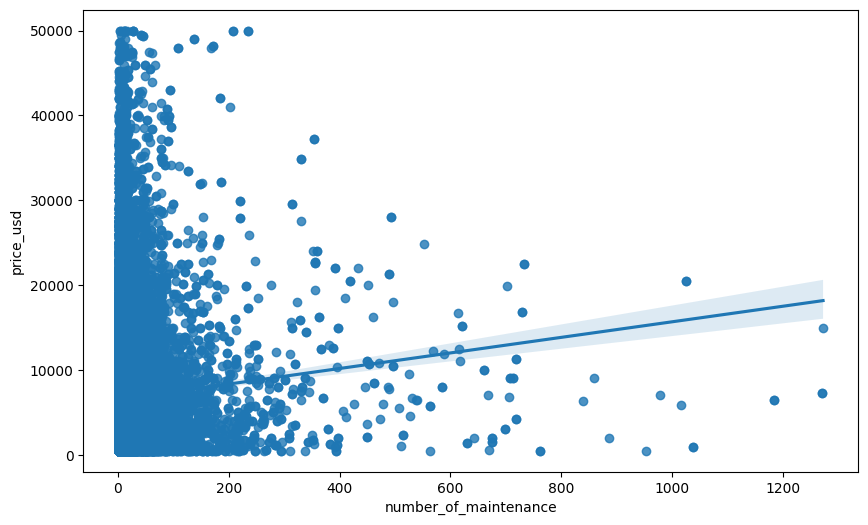

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="number_of_maintenance", y="price_usd", data=dataTrain)

The calculation proves that a correlation is lesser than 0.1 percent and indicates no correlation and the p-value lesser than 0.05 confirms it. This feature is not a critical feature for predicition

A P-value less than 0.05 (commonly used significance level) suggests that the correlation is statistically significant and hence reject the Null hypothesis.

What is my null hypothesis?
H0: The number_of_maintenance is correlated to price.

My alternate hypothesis
HA: The number_of_maintenance is not correlated to price.

A p-value  9.45757476702243e-40 less than 0.05 typically indicates statistical significance, suggesting strong evidence 'against" the null hypothesis and accept alternate hypothesis.

In [ ]:
pearson_coef, p_value = stats.pearsonr(dataTrain['number_of_maintenance'], dataTrain['price_usd'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.05896587234264712  with a P-value of P = 9.457574767021285e-40


---- this plot shows no correlation with points all over the graph ----

*************check correlation between duration listed and price***************

<Axes: xlabel='duration_listed', ylabel='price_usd'>

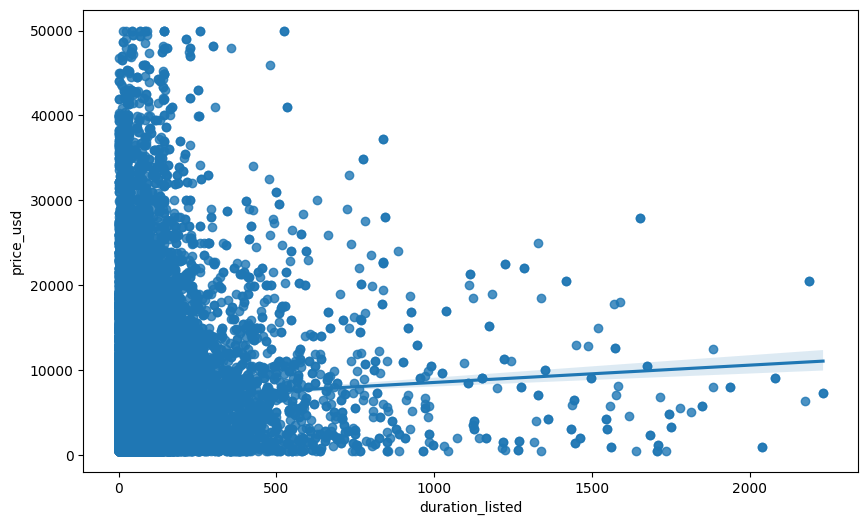

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="duration_listed", y="price_usd", data=dataTrain)

In [ ]:
pearson_coef, p_value = stats.pearsonr(dataTrain['duration_listed'], dataTrain['price_usd'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.03589305102194969  with a P-value of P = 9.979407828196084e-16


### Box Plot
These plots are used for categorical data to determine the importance of features for prediction.

In the given plot below, it is observed that the price range vary for automatic and manual transmisson. This indicates the categories can vary with price hence feature can be used for prediction

<Axes: xlabel='transmission', ylabel='price_usd'>

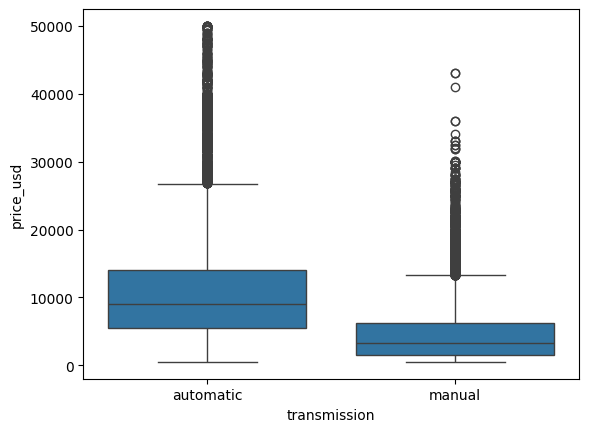

In [ ]:
sns.boxplot(x="transmission", y="price_usd", data=dataTrain)

The box plot shows how prices vary based on different colors. This shows that color can be used as a feature for price prediction.

<Axes: xlabel='color', ylabel='price_usd'>

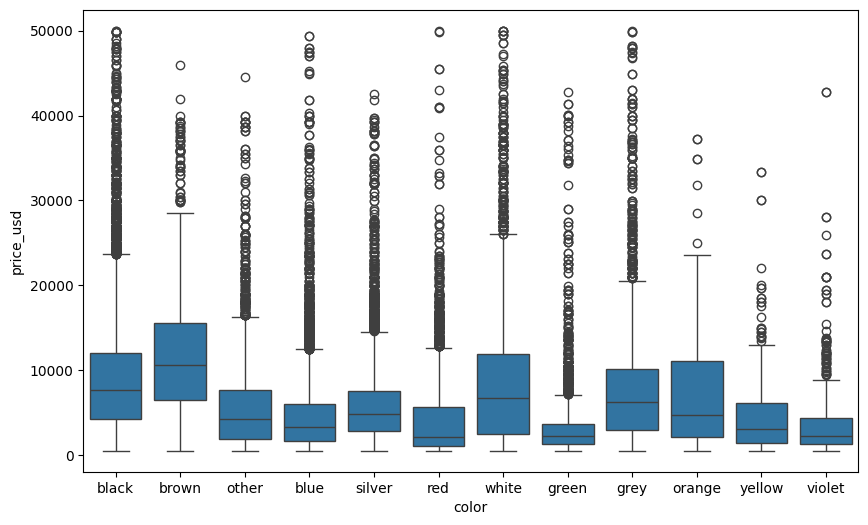

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="color", y="price_usd", data=dataTrain)

This plot shows engine fuel types and how they affect the price. Hybrid petroll with the highest price range while hybrid diesel with lowest price range. This feature can be used for prediction.

<Axes: xlabel='engine_fuel', ylabel='price_usd'>

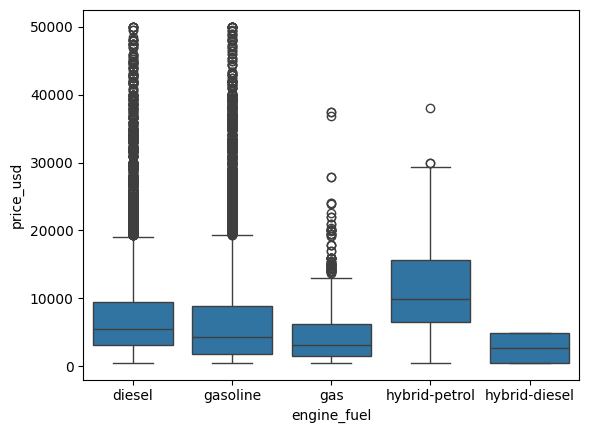

In [ ]:
sns.boxplot(x="engine_fuel", y="price_usd", data=dataTrain)

The engine type (based on fuel type) shows that both categories have almost the same price range which will not bring differences in price when prediction is made. Hence this feature is not suitable for price prediction

<Axes: xlabel='engine_type', ylabel='price_usd'>

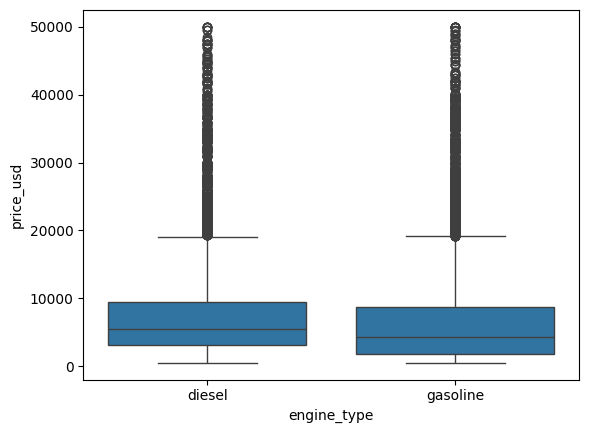

In [ ]:
sns.boxplot(x="engine_type", y="price_usd", data=dataTrain)

Thee box plot shows body type categories with varying prices per category hence this feature can be used for price prediction, not so signficant though

<Axes: xlabel='body_type', ylabel='price_usd'>

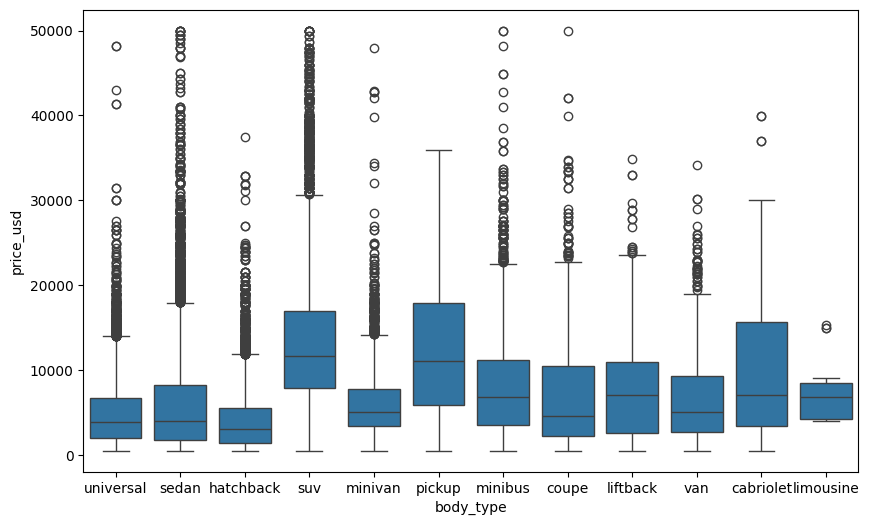

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="body_type", y="price_usd", data=dataTrain)

Has warranty feature shows a huge difference in price ranges between cars with warrant and vice versa. This feature is very important for price prediction as the bigger the difference in range the better the feature.

<Axes: xlabel='has_warranty', ylabel='price_usd'>

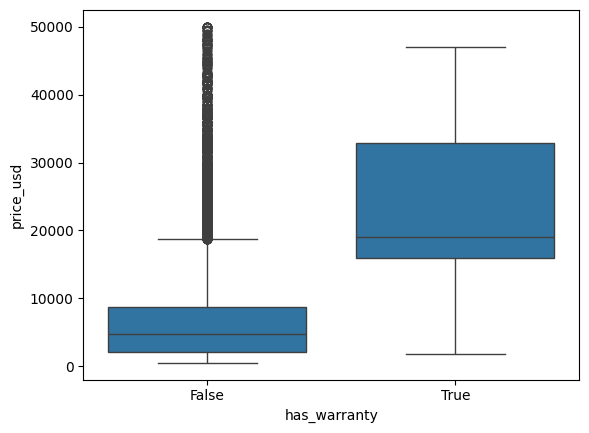

In [ ]:
sns.boxplot(x="has_warranty", y="price_usd", data=dataTrain)

This feature is similar to the feature above, all three categories have wider price ranges between one another. This feature is also crucial for price prediction.

<Axes: xlabel='ownership', ylabel='price_usd'>

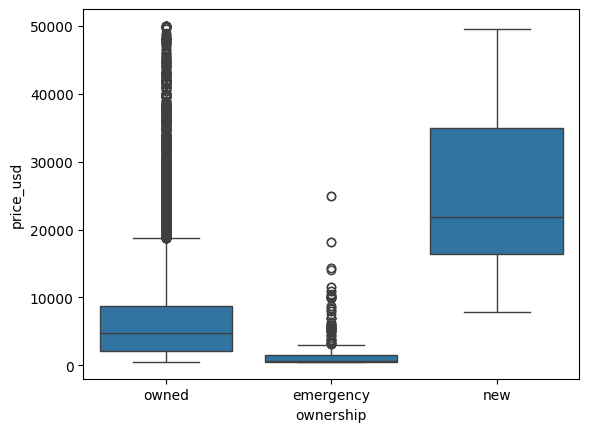

In [ ]:
sns.boxplot(x="ownership", y="price_usd", data=dataTrain)

Front and rear drive have **minimal price difference** while all drive shows a **greater difference** hence the feature can be used for prediction.

<Axes: xlabel='type_of_drive', ylabel='price_usd'>

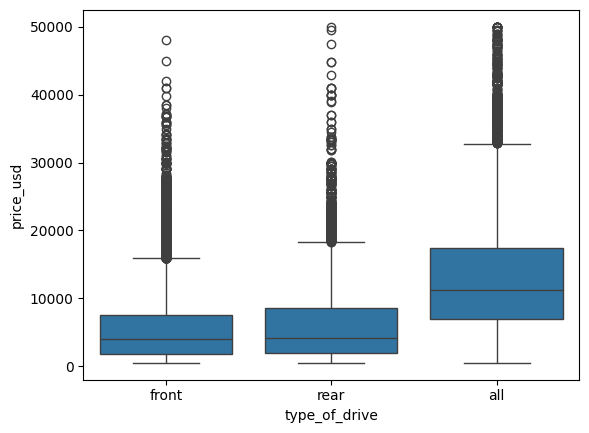

In [ ]:
sns.boxplot(x="type_of_drive", y="price_usd", data=dataTrain)

With not same price range between categories this feature is  suitable for prediction.

<Axes: xlabel='is_exchangeable', ylabel='price_usd'>

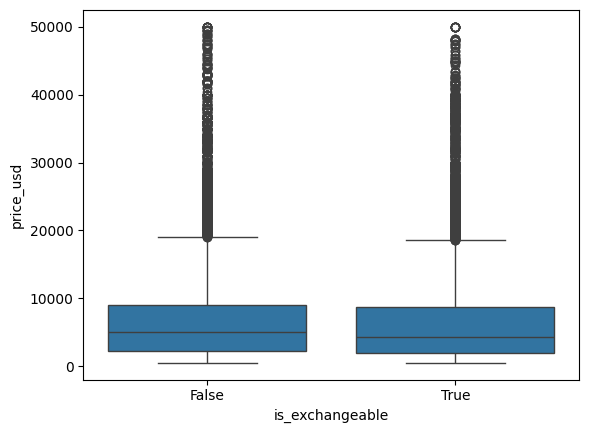

In [ ]:
sns.boxplot(x="is_exchangeable", y="price_usd", data=dataTrain)

This plot shows that the manufacturer name is not important when selling a car. The variety of price ranges for all categories prove that the feature is insignificant for price prediction.

<Axes: xlabel='manufacturer_name', ylabel='price_usd'>

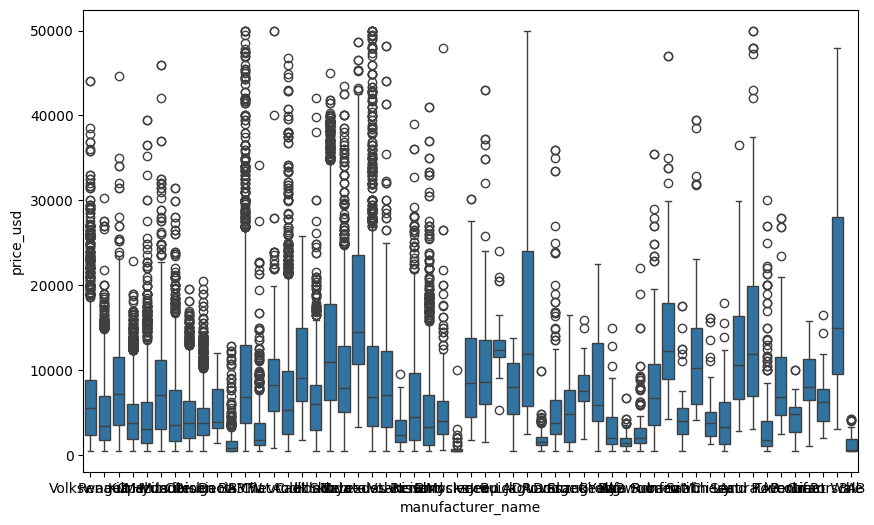

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="manufacturer_name", y="price_usd", data=dataTrain)

Using Exploratory data analysis, few features can be dropped because they had no impact on the price prediction. Those features are removed with the function below.(Training set)

In [ ]:
dataTrain.drop(['number_of_maintenance', 'duration_listed', 'engine_type','is_exchangeable'], axis = 1, inplace = True)

Same features are removed for testing set since the data will be used to train the model

In [ ]:
dataTrain.shape


(49985, 13)

### Data Transformation
Label encoding of categorical features in the training set. Label encoding is converting categorical data into numerical data since the model cant understand textual data.

----Data Preparation--------

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
dataTrain.manufacturer_name = labelencoder.fit_transform(dataTrain.manufacturer_name)
dataTrain.transmission = labelencoder.fit_transform(dataTrain.transmission)
dataTrain.color = labelencoder.fit_transform(dataTrain.color)
dataTrain.engine_fuel = labelencoder.fit_transform(dataTrain.engine_fuel)

dataTrain.body_type = labelencoder.fit_transform(dataTrain.body_type)
dataTrain.has_warranty = labelencoder.fit_transform(dataTrain.has_warranty)
dataTrain.ownership = labelencoder.fit_transform(dataTrain.ownership)
dataTrain.type_of_drive = labelencoder.fit_transform(dataTrain.type_of_drive)


Label encoding of all categorical data in the testing set.

Checking on the remaining features and if label encoding is applied to all categorical features (Training set).

In [ ]:
dataTrain.head(10)

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_capacity,body_type,has_warranty,ownership,type_of_drive,number_of_photos,price_usd
0,48,0,0,130000,2016,0,1.6,10,0,2,1,17,13150.0
1,39,1,2,149000,2012,2,1.6,8,0,2,1,9,7500.0
2,23,0,2,110000,2014,2,1.6,2,0,2,1,5,12200.0
3,35,0,6,255100,2007,2,1.8,2,0,2,1,10,4950.0
4,30,1,1,650000,1999,2,2.0,8,0,2,1,5,3000.0
5,35,0,8,368632,2000,0,2.2,9,0,2,2,5,3999.0
6,39,1,7,367000,1997,2,1.4,8,0,2,1,6,940.0
7,18,0,10,135000,2012,2,2.0,8,0,2,1,7,11500.0
8,33,0,8,200800,2004,2,2.4,9,0,2,0,16,5850.0
9,9,1,8,300000,1997,2,1.8,2,0,2,1,3,700.0


Check on the remaining features and application of label encoding to all categorical features (Testing set).

--Data Transfornation (normalization) ----
minmax is used for scaling down the features between the range of -1 and 1. This helps the model make better prediction as it is easy to understand. The scaling is applied to the training and testing set  --- You can try using z score normalization also

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataTrain = scaler.fit_transform(dataTrain)

In [ ]:
dataTrain

array([[0.88888889, 0.        , 0.        , ..., 0.5       , 0.18823529,
        0.25555556],
       [0.72222222, 1.        , 0.18181818, ..., 0.5       , 0.09411765,
        0.14141414],
       [0.42592593, 0.        , 0.18181818, ..., 0.5       , 0.04705882,
        0.23636364],
       ...,
       [0.24074074, 1.        , 0.63636364, ..., 0.5       , 0.07058824,
        0.03030303],
       [0.05555556, 0.        , 0.36363636, ..., 1.        , 0.10588235,
        0.09252525],
       [0.90740741, 0.        , 0.54545455, ..., 0.5       , 0.05882353,
        0.12727273]])

Dividing the data for training and testing accordingly. X takes the all features while Y takes the target variable


In [ ]:
# Convert the NumPy array back into a Pandas DataFrame
dataTrain = pd.DataFrame(dataTrain, columns=['manufacturer_name', 'transmission', 'color', 'odometer_value', 'year_produced', 'engine_fuel', 'engine_capacity', 'body_type', 'has_warranty', 'ownership', 'type_of_drive', 'number_of_photos', 'price_usd'])

# Now you can use drop on dataTrain
x_train=dataTrain.drop('price_usd',axis=1)
y_train=dataTrain[['price_usd']]

In [ ]:
#In case you have no separate testing data, use the following code
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.3, random_state = 0)
#30% of the trainng data will be used for testing


In [ ]:
x_train.head()

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_capacity,body_type,has_warranty,ownership,type_of_drive,number_of_photos
10707,0.259259,1.0,0.636364,0.450,0.623377,0.5,0.230769,0.727273,0.0,1.0,1.0,0.023529
18829,0.037037,1.0,0.000000,0.300,0.649351,0.5,0.269231,0.727273,0.0,1.0,0.5,0.082353
31418,0.888889,0.0,0.000000,0.195,0.896104,0.0,0.230769,0.454545,0.0,1.0,0.5,0.141176
28459,0.185185,1.0,0.636364,0.280,0.831169,0.5,0.153846,0.727273,0.0,1.0,0.5,0.117647
20213,0.037037,1.0,0.090909,0.346,0.688312,0.5,0.256410,0.727273,0.0,1.0,0.0,0.105882


In [ ]:
y_train.head()

,price_usd
10707,0.002020
18829,0.036343
31418,0.473737
28459,0.017172
20213,0.070707


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(34989, 12)
(34989, 1)
(14996, 12)
(14996, 1)


## Fit Model
### Multiple Linear Regression
Calling multiple linear regression model and fitting the training set

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model_mlr = model.fit(x_train,y_train)

Making price prediction using the testing set (Fit to MLR)

In [ ]:
y_pred1 = model_mlr.predict(x_test)


### MLR Evaluation


Calculating the Mean Square Error for MLR model

In [ ]:
mse1 = mean_squared_error(y_test, y_pred1)
print('The mean square error for Multiple Linear Regression: ', mse1)

The mean square error for Multiple Linear Regression:  0.006091606558652381


Calculating the Mean Absolute Error for MLR model

In [ ]:
mae1= mean_absolute_error(y_test, y_pred1)
print('The mean absolute error for Multiple Linear Regression: ', mae1)

The mean absolute error for Multiple Linear Regression:  0.05035080395246194


### Random Forest Regressor (checking other Models)
Calling the random forest model and fitting the training data

In [ ]:
rf = RandomForestRegressor()
model_rf = rf.fit(x_train,y_train)

Prediction of car prices using the testing data

In [ ]:
y_pred2 = model_rf.predict(x_test)

### Random Forest Evaluation


Calculating the Mean Square Error for Random Forest Model (Lowest MSE value)

In [ ]:
mse2 = mean_squared_error(y_test, y_pred2)
print('The mean square error of price and predicted value is: ', mse2)

The mean square error of price and predicted value is:  0.0010788303961425632


Calculating the Mean Absolute Error for Random Forest Model (Lowest Mean Absolute Error)

In [ ]:
mae2= mean_absolute_error(y_test, y_pred2)
print('The mean absolute error of price and predicted value is: ', mae2)

The mean absolute error of price and predicted value is:  0.017004993975210655


### LASSO Model
Calling the model and fitting the training data

In [ ]:
LassoModel = Lasso()
model_lm = LassoModel.fit(x_train,y_train)

Price prediction uisng testing data

In [ ]:
y_pred3 = model_lm.predict(x_test)

### LASSO Evaluation  (checking another model)


Mean Absolute Error for LASSO Model

In [ ]:
mae3= mean_absolute_error(y_test, y_pred3)
print('The mean absolute error of price and predicted value is: ', mae3)

The mean absolute error of price and predicted value is:  0.0930606200548609


Mean Squared Error for the LASSO Model

In [ ]:
mse3 = mean_squared_error(y_test, y_pred3)
print('The mean square error of price and predicted value is: ', mse3)

The mean square error of price and predicted value is:  0.01703108229882711


In [ ]:
scores = [('MLR', mae1),
          ('Random Forest', mae2),
          ('LASSO', mae3)
         ]

In [ ]:
mae = pd.DataFrame(data = scores, columns=['Model', 'MAE Score'])
mae

,Model,MAE Score
0,MLR,0.050351
1,Random Forest,0.017005
2,LASSO,0.093061


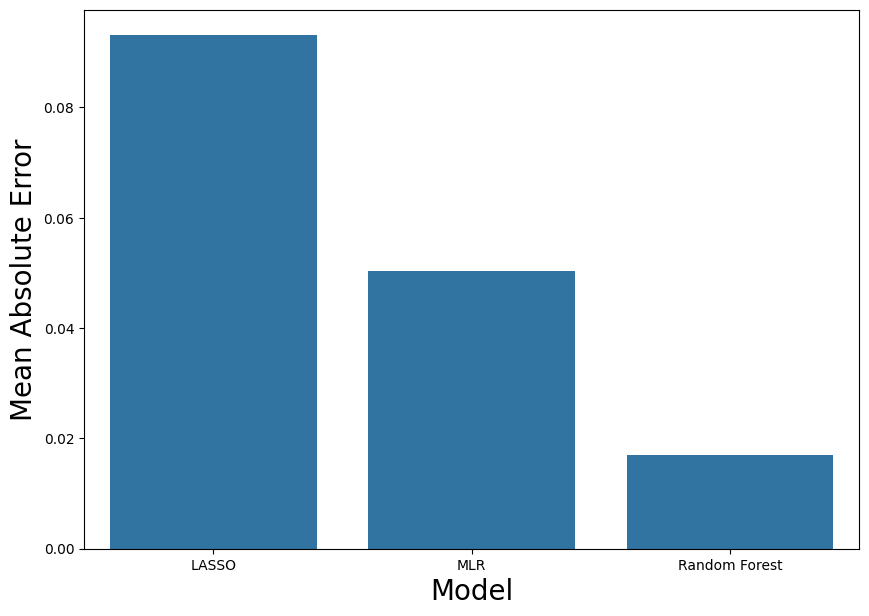

In [ ]:
mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,7))
sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('Mean Absolute Error', size=20)

plt.show()

#Based on the MAE, it is concluded that the Random Forest is the best regression model for predicting the car price based on the 12 predictor variables